## Importing Libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,classification_report,f1_score,matthews_corrcoef,recall_score
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,mean_squared_error,mean_absolute_error
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings


## Import Data

In [14]:
df = pd.read_csv("C:\\Users\\danu7\\Downloads\\Klasifikasi Emas\\combined_data.csv")
# df = df.iloc[:, 3:]
df = df.rename(columns={'CandlePattern': 'Pola','y':'Y'})
df.head()

,MA,EMA,DEMA,KAMA,SMA,SAR,ADX,APO,BOP,CCI,...,RSI,AD,ADOSC,OBV,TRANGE,ATR,NATR,Pola,Pattern,Y
0,1856.0,1869.134389,1827.084568,-2.850288e+113,1871.0,1921.607196,0.0,-59.134389,-0.600000,-169.934641,...,21.118831,-5.047333e+06,-0.053377,-17470000.0,50.0,34.460214,1.903879,Marubozu Bearish,BearLow,0
1,1844.0,1858.382682,1812.840955,-2.838424e+113,1859.0,1914.310764,0.0,-48.382682,-0.500000,-152.777778,...,21.118831,-1.135733e+07,-0.114999,-11160000.0,20.0,31.831085,1.758623,Shooting Star,BullishHarami,0
2,1832.0,1849.585831,1806.194799,-2.826609e+113,1850.0,1907.452118,0.0,-39.585831,-0.500000,-114.683816,...,21.118831,-2.088733e+07,-0.208269,-1630000.0,20.0,29.679978,1.639778,Shooting Star,BullishHigh,1
3,1818.0,1844.206589,1809.219307,-2.814844e+113,1847.0,1901.004991,0.0,-24.206589,0.000000,-85.585586,...,27.532279,-1.865067e+07,-0.119798,5080000.0,30.0,29.738164,1.633965,Doji,BullishHorn,0
4,1810.0,1836.169027,1800.650277,-2.803128e+113,1840.0,1894.944692,0.0,-36.169027,-0.333333,-93.975904,...,23.319037,-2.269400e+07,-0.207582,-7050000.0,30.0,29.785771,1.654765,Spinning Top Bearish,BearLow,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16011 entries, 0 to 16010
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MA       16011 non-null  float64
 1   EMA      16011 non-null  float64
 2   DEMA     16011 non-null  float64
 3   KAMA     16011 non-null  float64
 4   SMA      16011 non-null  float64
 5   SAR      16011 non-null  float64
 6   ADX      16011 non-null  float64
 7   APO      16011 non-null  float64
 8   BOP      16011 non-null  float64
 9   CCI      16011 non-null  float64
 10  MACD     16011 non-null  float64
 11  MFI      16011 non-null  float64
 12  MOM      16011 non-null  float64
 13  RSI      16011 non-null  float64
 14  AD       16011 non-null  float64
 15  ADOSC    16011 non-null  float64
 16  OBV      16011 non-null  float64
 17  TRANGE   16011 non-null  float64
 18  ATR      16011 non-null  float64
 19  NATR     16011 non-null  float64
 20  Pola     16011 non-null  object 
 21  Pattern  160

### Standarisasi Data Numerik

In [16]:
numeric_cols = ["MA","EMA","DEMA","KAMA","SMA","SAR","ADX","APO","BOP","CCI","MACD","MFI","MOM","RSI","AD","ADOSC","OBV","ATR","NATR","TRANGE"]
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### Exploratory Data Analysis

In [17]:
pola_counts = df['Pola'].value_counts()
print("Count of each unique value in the 'Pola' column:")
print(pola_counts)

Count of each unique value in the 'Pola' column:
Pola
Marubozu Bearish         3246
Marubozu Bullish         1949
Gravestone Doji          1932
Doji                     1650
Shooting Star            1601
Hanging Man              1481
Inverted Hammer          1347
Dragonfly Doji           1302
Hammer                    821
Spinning Top Bearish      282
Bearish Full Marubozu     216
Spinning Top Bullish      184
Name: count, dtype: int64


Text(0.5, 1.0, 'Heatmap Korelasi')

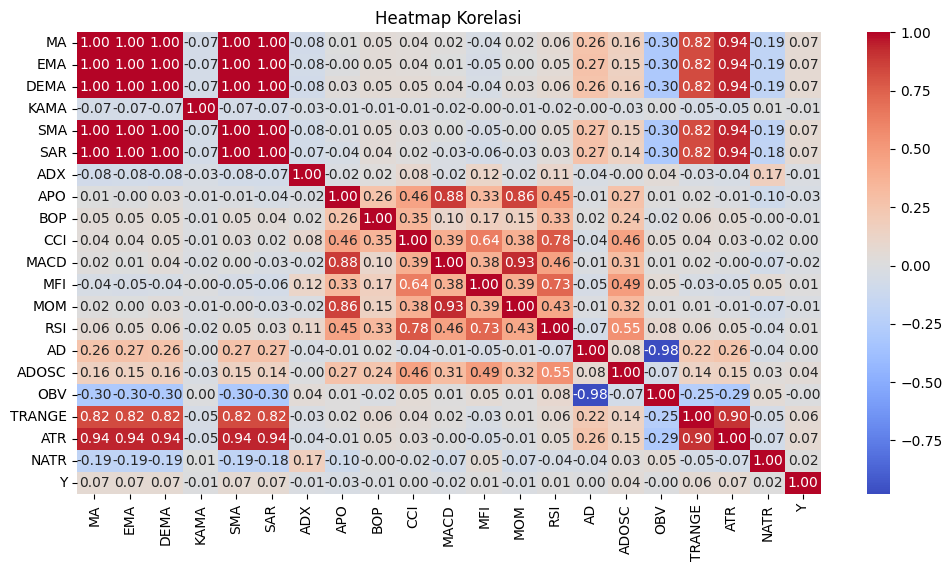

In [18]:
# Menghitung Matriks Korelasi
correlation_matrix = df.corr(numeric_only=True)

# Membuat Visualisasi Heatmap
plt.figure(figsize=(12, 6))  # Mengatur ukuran gambar
sns.heatmap(
    correlation_matrix,   
    annot=True,
    cmap='coolwarm',
    fmt='.2f'  
)
plt.title('Heatmap Korelasi')

## Handle categorical features

In [19]:
copy_df = df[df['Pola'] != 'Bearish Full Marubozu'].copy()
X = copy_df.drop('Pola', axis=1)
y = copy_df['Pola']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (15795, 22)
Shape of y: (15795,)


In [20]:
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
display(X.head())

,MA,EMA,DEMA,KAMA,SMA,SAR,ADX,APO,BOP,CCI,...,ATR,NATR,Y,Pattern_BearHigh,Pattern_BearHorn,Pattern_BearLow,Pattern_BullishHarami,Pattern_BullishHigh,Pattern_BullishHorn,Pattern_BullishLow
0,-0.383958,-0.382810,-0.386837,-2.772118,-0.382525,-0.379233,-2.166153,-0.173100,-0.920286,-1.541193,...,-0.470322,-0.613378,0,False,False,True,False,False,False,False
1,-0.385217,-0.383938,-0.388331,-2.760579,-0.383784,-0.379997,-2.166153,-0.140823,-0.735929,-1.379826,...,-0.479270,-0.646807,0,False,False,False,True,False,False,False
2,-0.386477,-0.384862,-0.389028,-2.749088,-0.384729,-0.380715,-2.166153,-0.114415,-0.735929,-1.021536,...,-0.486590,-0.674158,1,False,False,False,False,True,False,False
3,-0.387946,-0.385426,-0.388711,-2.737645,-0.385043,-0.381390,-2.166153,-0.068246,0.185857,-0.747854,...,-0.486392,-0.675496,0,False,False,False,False,False,True,False
4,-0.388785,-0.386270,-0.389610,-2.726250,-0.385778,-0.382024,-2.166153,-0.104158,-0.428667,-0.826769,...,-0.486230,-0.670709,0,False,False,True,False,False,False,False


## Apply smote
Use the SMOTE algorithm to oversample the minority classes in the 'Pola' column.

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Shape of X before SMOTE:", X.shape)
print("Shape of y before SMOTE:", y.shape)
print("Shape of X after SMOTE:", X_resampled.shape)
print("Shape of y after SMOTE:", y_resampled.shape)

Shape of X before SMOTE: (15795, 28)
Shape of y before SMOTE: (15795,)
Shape of X after SMOTE: (35706, 28)
Shape of y after SMOTE: (35706,)


In [22]:
print("Value counts of original 'Pola' column:")
print(y.value_counts())
print("\nValue counts of resampled 'Pola' column after SMOTE:")
print(y_resampled.value_counts())

Value counts of original 'Pola' column:
Pola
Marubozu Bearish        3246
Marubozu Bullish        1949
Gravestone Doji         1932
Doji                    1650
Shooting Star           1601
Hanging Man             1481
Inverted Hammer         1347
Dragonfly Doji          1302
Hammer                   821
Spinning Top Bearish     282
Spinning Top Bullish     184
Name: count, dtype: int64

Value counts of resampled 'Pola' column after SMOTE:
Pola
Marubozu Bearish        3246
Shooting Star           3246
Doji                    3246
Spinning Top Bearish    3246
Hanging Man             3246
Marubozu Bullish        3246
Hammer                  3246
Inverted Hammer         3246
Gravestone Doji         3246
Spinning Top Bullish    3246
Dragonfly Doji          3246
Name: count, dtype: int64


In [23]:
resampled_df = pd.concat([X_resampled, y_resampled.rename('Pola')], axis=1)
resampled_df.head()

,MA,EMA,DEMA,KAMA,SMA,SAR,ADX,APO,BOP,CCI,...,NATR,Y,Pattern_BearHigh,Pattern_BearHorn,Pattern_BearLow,Pattern_BullishHarami,Pattern_BullishHigh,Pattern_BullishHorn,Pattern_BullishLow,Pola
0,-0.383958,-0.382810,-0.386837,-2.772118,-0.382525,-0.379233,-2.166153,-0.173100,-0.920286,-1.541193,...,-0.613378,0,False,False,True,False,False,False,False,Marubozu Bearish
1,-0.385217,-0.383938,-0.388331,-2.760579,-0.383784,-0.379997,-2.166153,-0.140823,-0.735929,-1.379826,...,-0.646807,0,False,False,False,True,False,False,False,Shooting Star
2,-0.386477,-0.384862,-0.389028,-2.749088,-0.384729,-0.380715,-2.166153,-0.114415,-0.735929,-1.021536,...,-0.674158,1,False,False,False,False,True,False,False,Shooting Star
3,-0.387946,-0.385426,-0.388711,-2.737645,-0.385043,-0.381390,-2.166153,-0.068246,0.185857,-0.747854,...,-0.675496,0,False,False,False,False,False,True,False,Doji
4,-0.388785,-0.386270,-0.389610,-2.726250,-0.385778,-0.382024,-2.166153,-0.104158,-0.428667,-0.826769,...,-0.670709,0,False,False,True,False,False,False,False,Spinning Top Bearish


In [24]:
pola_y_counts = resampled_df.groupby(['Pola', 'Y']).size().unstack(fill_value=0)
print("Count of each 'Pola' for each 'Y' value:")
display(pola_y_counts)

Count of each 'Pola' for each 'Y' value:


Y,0,1
Pola,,
Doji,2131,1115
Dragonfly Doji,2326,920
Gravestone Doji,1998,1248
Hammer,2350,896
Hanging Man,2211,1035
Inverted Hammer,2126,1120
Marubozu Bearish,1838,1408
Marubozu Bullish,2034,1212
Shooting Star,1974,1272


In [25]:
def sample_group(group):
    """Samples 1000 rows from each group if the group has more than 1000 rows,
    otherwise returns all rows in the group."""
    if len(group) > 1000:
        return group.sample(1000, random_state=100)
    else:
        return group

undersampled_df = resampled_df.groupby(['Pola', 'Y']).apply(sample_group).reset_index(drop=True)

print("Shape of data after undersampling:", undersampled_df.shape)
print("\nValue counts of 'Pola' and 'Y' after undersampling:")
display(undersampled_df.groupby(['Pola', 'Y']).size().unstack(fill_value=0))

Shape of data after undersampling: (21387, 29)

Value counts of 'Pola' and 'Y' after undersampling:


C:\Users\danu7\AppData\Local\Temp\ipykernel_14568\1888088336.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  undersampled_df = resampled_df.groupby(['Pola', 'Y']).apply(sample_group).reset_index(drop=True)


Y,0,1
Pola,,
Doji,1000,1000
Dragonfly Doji,1000,920
Gravestone Doji,1000,1000
Hammer,1000,896
Hanging Man,1000,1000
Inverted Hammer,1000,1000
Marubozu Bearish,1000,1000
Marubozu Bullish,1000,1000
Shooting Star,1000,1000


In [26]:
undersampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21387 entries, 0 to 21386
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MA                     21387 non-null  float64
 1   EMA                    21387 non-null  float64
 2   DEMA                   21387 non-null  float64
 3   KAMA                   21387 non-null  float64
 4   SMA                    21387 non-null  float64
 5   SAR                    21387 non-null  float64
 6   ADX                    21387 non-null  float64
 7   APO                    21387 non-null  float64
 8   BOP                    21387 non-null  float64
 9   CCI                    21387 non-null  float64
 10  MACD                   21387 non-null  float64
 11  MFI                    21387 non-null  float64
 12  MOM                    21387 non-null  float64
 13  RSI                    21387 non-null  float64
 14  AD                     21387 non-null  float64
 15  AD

# Logistic Regression

In [27]:
def train_and_evaluate_pola_model_optimized(df: pd.DataFrame, pola_name: str):
    print(f"--- Training Model with Hyperparameter Tuning for Pola: {pola_name} ---")

    # 1. Filter data
    pola_df = df[df['Pola'] == pola_name].copy()

    if 'Y' not in pola_df.columns:
        print("Error: Target column 'Y' not found.")
        return None

    X = pola_df.drop(['Y', 'Pola'], axis=1, errors='ignore')
    y = pola_df['Y']

    # 2. Split train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 3. Define Logistic Regression model (default)
    log_reg = LogisticRegression(
        penalty='l2',       # lbfgs hanya mendukung l2
        solver='lbfgs',
        max_iter=1000, 
        random_state=42
    )

    # 4. Define hyperparameter grid (hanya C, karena lbfgs + l2)
    param_grid = {
        "C": np.logspace(-2, 3, 10)  # 10 nilai dari 0.01 hingga 1000
    }

    # 5. GridSearchCV untuk mencari C terbaik
    grid_search = GridSearchCV(
        log_reg, param_grid, cv=10, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Ambil model terbaik
    best_log_reg = grid_search.best_estimator_

    # 6. Predict & evaluate
    y_pred = best_log_reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    classification_rep = classification_report(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'classification_report': classification_rep,
        'confusion_matrix': conf_matrix,
        'best_params': grid_search.best_params_,
        'model': best_log_reg
    }


# Random Forest

In [28]:
def train_and_evaluate_pola_model_rf_gridsearch(df: pd.DataFrame, pola_name: str):

  print(f"--- Starting Comprehensive RF GridSearch for Pola: {pola_name} ---")

  # 1. Data Filtering & Preparation
  pola_df = df[df['Pola'] == pola_name].copy()

  if len(pola_df) < 50:
      print(f"Warning: Insufficient data ({len(pola_df)} rows) for Pola: {pola_name}. Skipping evaluation.")
      return None

  X = pola_df.drop(['Y', 'Pola'], axis=1, errors='ignore')
  y = pola_df['Y']

  if X.empty:
      print(f"Error: Feature set (X) is empty for Pola: {pola_name}. Check column names.")
      return None

  # 2. Split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  # 3. Define the Comprehensive Hyperparameter Grid
  rf = RandomForestClassifier(random_state=42, class_weight='balanced')

  grid = {
      "n_estimators": np.arange(10, 100, 5),
      "criterion": ["gini", "entropy"],
      "min_samples_leaf": [2, 4, 6, 50],
      "max_depth": np.arange(1, 10),
  }

  # 4. Initialize and Run Grid Search Cross-Validation
  rf_grid_search = GridSearchCV(rf, grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=0)
  rf_grid_search.fit(X_train, y_train)

  # Ambil model terbaik yang ditemukan Grid Search
  best_rf_model = rf_grid_search.best_estimator_

  # 5. Evaluation using the Best Model
  y_pred = best_rf_model.predict(X_test)

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  classification_rep = classification_report(y_test, y_pred, zero_division=0)
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Return the evaluation results
  return {
      'accuracy': accuracy,
      'f1_score': f1,
      'classification_report': classification_rep,
      'confusion_matrix': conf_matrix,
      'best_params': rf_grid_search.best_params_
  }

## Collect results for logistic regression


In [29]:
unique_polas = undersampled_df['Pola'].unique()
lr_results = []

for pola in unique_polas:
  results = train_and_evaluate_pola_model_optimized(undersampled_df, pola)
  if results:
    lr_results.append({'Pola': pola, **results})

print("Logistic Regression Results:")
display(pd.DataFrame(lr_results))

--- Training Model with Hyperparameter Tuning for Pola: Doji ---


--- Training Model with Hyperparameter Tuning for Pola: Dragonfly Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Gravestone Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Hammer ---
--- Training Model with Hyperparameter Tuning for Pola: Hanging Man ---
--- Training Model with Hyperparameter Tuning for Pola: Inverted Hammer ---
--- Training Model with Hyperparameter Tuning for Pola: Marubozu Bearish ---
--- Training Model with Hyperparameter Tuning for Pola: Marubozu Bullish ---
--- Training Model with Hyperparameter Tuning for Pola: Shooting Star ---
--- Training Model with Hyperparameter Tuning for Pola: Spinning Top Bearish ---
--- Training Model with Hyperparameter Tuning for Pola: Spinning Top Bullish ---
Logistic Regression Results:


,Pola,accuracy,f1_score,classification_report,confusion_matrix,best_params,model
0,Doji,0.555000,0.554454,precision recall f1-score ...,"[[118, 82], [96, 104]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
1,Dragonfly Doji,0.580729,0.574502,precision recall f1-score ...,"[[139, 61], [100, 84]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
2,Gravestone Doji,0.490000,0.490000,precision recall f1-score ...,"[[98, 102], [102, 98]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
3,Hammer,0.618421,0.617514,precision recall f1-score ...,"[[133, 67], [78, 102]]",{'C': 21.544346900318846},LogisticRegression(C=np.float64(21.54434690031...
4,Hanging Man,0.515000,0.514951,precision recall f1-score ...,"[[101, 99], [95, 105]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
5,Inverted Hammer,0.545000,0.543356,precision recall f1-score ...,"[[121, 79], [103, 97]]",{'C': 0.464158883361278},LogisticRegression(C=np.float64(0.464158883361...
6,Marubozu Bearish,0.522500,0.521636,precision recall f1-score ...,"[[113, 87], [104, 96]]",{'C': 0.03593813663804628},LogisticRegression(C=np.float64(0.035938136638...
7,Marubozu Bullish,0.515000,0.512942,precision recall f1-score ...,"[[90, 110], [84, 116]]",{'C': 0.03593813663804628},LogisticRegression(C=np.float64(0.035938136638...
8,Shooting Star,0.505000,0.504393,precision recall f1-score ...,"[[94, 106], [92, 108]]",{'C': 0.01},"LogisticRegression(C=np.float64(0.01), max_ite..."
9,Spinning Top Bearish,0.682796,0.683209,precision recall f1-score ...,"[[136, 64], [54, 118]]",{'C': 278.2559402207126},LogisticRegression(C=np.float64(278.2559402207...


## Collect results for random forest


In [30]:
unique_polas = undersampled_df['Pola'].unique()
rf_results = []

for pola in unique_polas:
  results = train_and_evaluate_pola_model_rf_gridsearch(undersampled_df, pola)
  if results:
    rf_results.append({'Pola': pola, **results})

print("Random Forest Results:")
display(pd.DataFrame(rf_results))

--- Starting Comprehensive RF GridSearch for Pola: Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Dragonfly Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Gravestone Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Hammer ---
--- Starting Comprehensive RF GridSearch for Pola: Hanging Man ---
--- Starting Comprehensive RF GridSearch for Pola: Inverted Hammer ---
--- Starting Comprehensive RF GridSearch for Pola: Marubozu Bearish ---
--- Starting Comprehensive RF GridSearch for Pola: Marubozu Bullish ---
--- Starting Comprehensive RF GridSearch for Pola: Shooting Star ---
--- Starting Comprehensive RF GridSearch for Pola: Spinning Top Bearish ---
--- Starting Comprehensive RF GridSearch for Pola: Spinning Top Bullish ---
Random Forest Results:


,Pola,accuracy,f1_score,classification_report,confusion_matrix,best_params
0,Doji,0.637500,0.637226,precision recall f1-score ...,"[[133, 67], [78, 122]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
1,Dragonfly Doji,0.674479,0.673980,precision recall f1-score ...,"[[142, 58], [67, 117]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
2,Gravestone Doji,0.615000,0.614035,precision recall f1-score ...,"[[113, 87], [67, 133]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
3,Hammer,0.781579,0.780925,precision recall f1-score ...,"[[165, 35], [48, 132]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
4,Hanging Man,0.652500,0.651347,precision recall f1-score ...,"[[119, 81], [58, 142]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
5,Inverted Hammer,0.635000,0.634854,precision recall f1-score ...,"[[123, 77], [69, 131]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
6,Marubozu Bearish,0.520000,0.519988,precision recall f1-score ...,"[[105, 95], [97, 103]]","{'criterion': 'entropy', 'max_depth': 5, 'min_..."
7,Marubozu Bullish,0.607500,0.607498,precision recall f1-score ...,"[[122, 78], [79, 121]]","{'criterion': 'gini', 'max_depth': 8, 'min_sam..."
8,Shooting Star,0.652500,0.651540,precision recall f1-score ...,"[[120, 80], [59, 141]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
9,Spinning Top Bearish,0.895161,0.895303,precision recall f1-score ...,"[[175, 25], [14, 158]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."


## Organize results for comparison


In [31]:
lr_df = pd.DataFrame(lr_results)
lr_df['Model'] = 'Logistic Regression'

rf_df = pd.DataFrame(rf_results)
rf_df['Model'] = 'Random Forest'

combined_results_df = pd.concat([lr_df, rf_df], ignore_index=True)

## Visualize the comparison

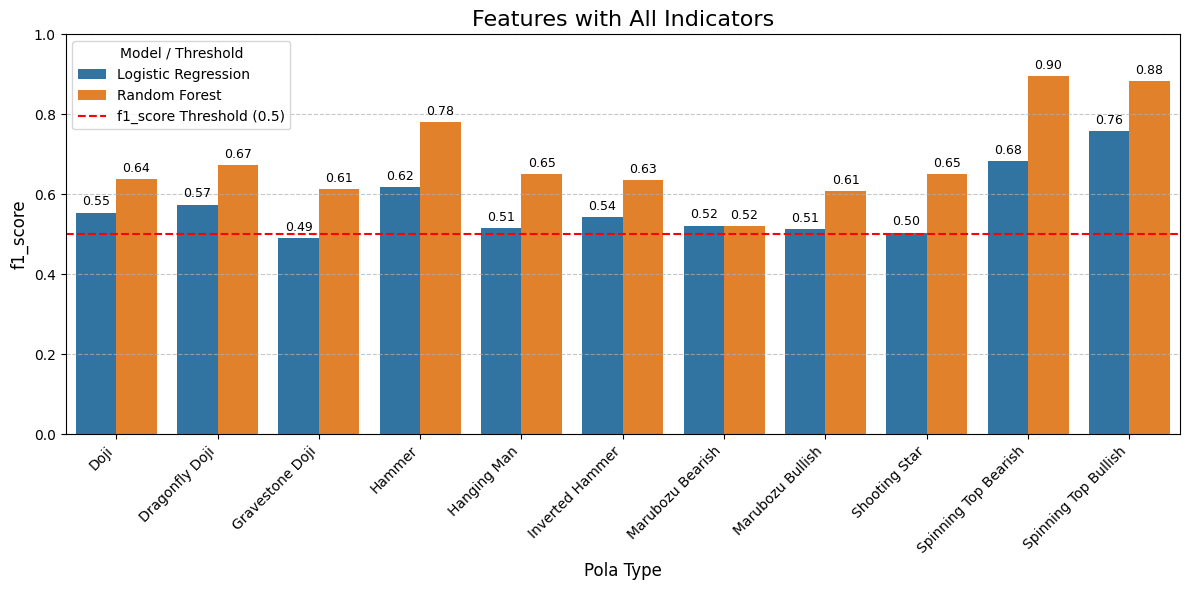

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Best practice: Buat Figure dan Axes
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat bar plot
sns.barplot(data=combined_results_df, x='Pola', y='f1_score', hue='Model')

# --- MENAMBAHKAN GARIS AKURASI 0.5 ---
plt.axhline(y=0.5, color='r', linestyle='--', label='f1_score Threshold (0.5)')

# --- MENAMBAHKAN LABEL ANGKA F1 SCORE ---
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

# Mengatur judul dan label
plt.title('Features with All Indicators', fontsize=16)
plt.xlabel('Pola Type', fontsize=12)
plt.ylabel('f1_score', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label sumbu X agar tidak tumpang tindih

# Menambahkan legenda untuk garis horizontal
plt.legend(title='Model / Threshold')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Menambahkan grid pada sumbu Y untuk keterbacaan
plt.ylim(0, 1) # Memastikan sumbu Y dari 0 hingga 1 (sesuai skala akurasi)

plt.tight_layout() # Menyesuaikan tata letak agar semua elemen terlihat
plt.show()

# Overlap

In [33]:
all_indicators = ["MA","EMA","DEMA","KAMA","SNA","SAR","ADX","APO","BOP","CCI","DX","MACD","MFI","MOM","RSI","AD","ADOSC","OBV","ATR","NATR","TRANGE"]
overlap = ["MA","EMA","DEMA","KAMA","SMA","SAR"]

# 1. Ambil kolom yang spesifik dari daftar 'overlap'
kolom_overlap = [col for col in overlap if col in undersampled_df.columns]

# 2. Ambil kolom-kolom "lain" dari df yang BUKAN indikator teknis dan bukan Pola atau Y
kolom_non_indikator_and_target = [col for col in undersampled_df.columns if col not in all_indicators + ['Pola', 'Y']]

# 3. Gabungkan kedua daftar kolom
kolom_final_overlap = kolom_overlap + kolom_non_indikator_and_target + ['Pola', 'Y']

# Lakukan subsetting
df_final_overlap = undersampled_df[kolom_final_overlap]

In [34]:
unique_polas = df_final_overlap['Pola'].unique()
lr_results = []

for pola in unique_polas:
  results = train_and_evaluate_pola_model_optimized(df_final_overlap, pola)
  if results: # Only append if results were returned (i.e., not None due to insufficient data)
    lr_results.append({'Pola': pola, **results})

print("Logistic Regression Results:")
display(pd.DataFrame(lr_results))

--- Training Model with Hyperparameter Tuning for Pola: Doji ---


--- Training Model with Hyperparameter Tuning for Pola: Dragonfly Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Gravestone Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Hammer ---
--- Training Model with Hyperparameter Tuning for Pola: Hanging Man ---
--- Training Model with Hyperparameter Tuning for Pola: Inverted Hammer ---
--- Training Model with Hyperparameter Tuning for Pola: Marubozu Bearish ---
--- Training Model with Hyperparameter Tuning for Pola: Marubozu Bullish ---
--- Training Model with Hyperparameter Tuning for Pola: Shooting Star ---
--- Training Model with Hyperparameter Tuning for Pola: Spinning Top Bearish ---
--- Training Model with Hyperparameter Tuning for Pola: Spinning Top Bullish ---
Logistic Regression Results:


,Pola,accuracy,f1_score,classification_report,confusion_matrix,best_params,model
0,Doji,0.545000,0.544954,precision recall f1-score ...,"[[107, 93], [89, 111]]",{'C': 278.2559402207126},LogisticRegression(C=np.float64(278.2559402207...
1,Dragonfly Doji,0.549479,0.539461,precision recall f1-score ...,"[[138, 62], [111, 73]]",{'C': 1.6681005372000592},LogisticRegression(C=np.float64(1.668100537200...
2,Gravestone Doji,0.520000,0.518266,precision recall f1-score ...,"[[116, 84], [108, 92]]",{'C': 1000.0},"LogisticRegression(C=np.float64(1000.0), max_i..."
3,Hammer,0.573684,0.572268,precision recall f1-score ...,"[[126, 74], [88, 92]]",{'C': 1000.0},"LogisticRegression(C=np.float64(1000.0), max_i..."
4,Hanging Man,0.530000,0.529706,precision recall f1-score ...,"[[111, 89], [99, 101]]",{'C': 278.2559402207126},LogisticRegression(C=np.float64(278.2559402207...
5,Inverted Hammer,0.547500,0.516686,precision recall f1-score ...,"[[160, 40], [141, 59]]",{'C': 1000.0},"LogisticRegression(C=np.float64(1000.0), max_i..."
6,Marubozu Bearish,0.517500,0.498932,precision recall f1-score ...,"[[142, 58], [135, 65]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
7,Marubozu Bullish,0.512500,0.485892,precision recall f1-score ...,"[[57, 143], [52, 148]]",{'C': 1000.0},"LogisticRegression(C=np.float64(1000.0), max_i..."
8,Shooting Star,0.520000,0.514121,precision recall f1-score ...,"[[82, 118], [74, 126]]",{'C': 278.2559402207126},LogisticRegression(C=np.float64(278.2559402207...
9,Spinning Top Bearish,0.537634,0.375968,precision recall f1-score ...,"[[200, 0], [172, 0]]",{'C': 0.01},"LogisticRegression(C=np.float64(0.01), max_ite..."


In [35]:
unique_polas = df_final_overlap['Pola'].unique()
rf_results = []

for pola in unique_polas:
  results = train_and_evaluate_pola_model_rf_gridsearch(df_final_overlap, pola)
  if results: # Only append if results were returned (i.e., not None due to insufficient data)
    rf_results.append({'Pola': pola, **results})

print("Random Forest Results:")
display(pd.DataFrame(rf_results))

--- Starting Comprehensive RF GridSearch for Pola: Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Dragonfly Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Gravestone Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Hammer ---
--- Starting Comprehensive RF GridSearch for Pola: Hanging Man ---
--- Starting Comprehensive RF GridSearch for Pola: Inverted Hammer ---
--- Starting Comprehensive RF GridSearch for Pola: Marubozu Bearish ---
--- Starting Comprehensive RF GridSearch for Pola: Marubozu Bullish ---
--- Starting Comprehensive RF GridSearch for Pola: Shooting Star ---
--- Starting Comprehensive RF GridSearch for Pola: Spinning Top Bearish ---
--- Starting Comprehensive RF GridSearch for Pola: Spinning Top Bullish ---
Random Forest Results:


,Pola,accuracy,f1_score,classification_report,confusion_matrix,best_params
0,Doji,0.560000,0.559989,precision recall f1-score ...,"[[111, 89], [87, 113]]","{'criterion': 'gini', 'max_depth': 6, 'min_sam..."
1,Dragonfly Doji,0.559896,0.557209,precision recall f1-score ...,"[[96, 104], [65, 119]]","{'criterion': 'gini', 'max_depth': 8, 'min_sam..."
2,Gravestone Doji,0.522500,0.521420,precision recall f1-score ...,"[[95, 105], [86, 114]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
3,Hammer,0.600000,0.599379,precision recall f1-score ...,"[[110, 90], [62, 118]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
4,Hanging Man,0.580000,0.572203,precision recall f1-score ...,"[[89, 111], [57, 143]]","{'criterion': 'gini', 'max_depth': 6, 'min_sam..."
5,Inverted Hammer,0.572500,0.570543,precision recall f1-score ...,"[[101, 99], [72, 128]]","{'criterion': 'entropy', 'max_depth': 7, 'min_..."
6,Marubozu Bearish,0.547500,0.545725,precision recall f1-score ...,"[[122, 78], [103, 97]]","{'criterion': 'entropy', 'max_depth': 2, 'min_..."
7,Marubozu Bullish,0.547500,0.528151,precision recall f1-score ...,"[[69, 131], [50, 150]]","{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
8,Shooting Star,0.565000,0.564989,precision recall f1-score ...,"[[112, 88], [86, 114]]","{'criterion': 'entropy', 'max_depth': 9, 'min_..."
9,Spinning Top Bearish,0.680108,0.680540,precision recall f1-score ...,"[[132, 68], [51, 121]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."


In [36]:
lr_df = pd.DataFrame(lr_results)
lr_df['Model'] = 'Logistic Regression'

rf_df = pd.DataFrame(rf_results)
rf_df['Model'] = 'Random Forest'

combined_results_df_overlap = pd.concat([lr_df, rf_df], ignore_index=True)

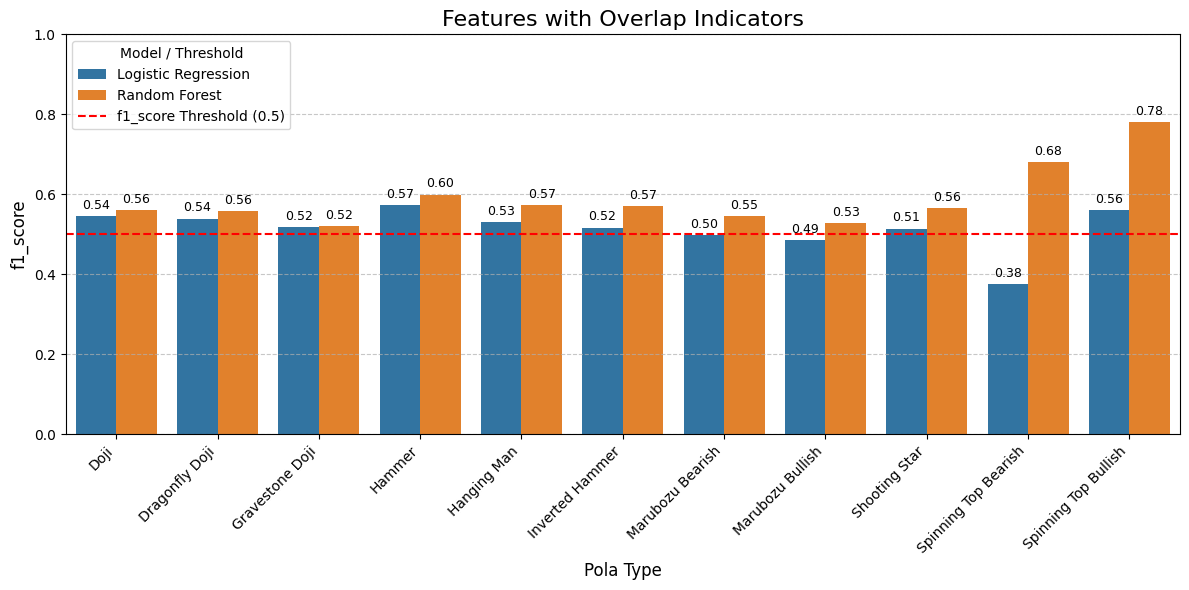

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Best practice: Buat Figure dan Axes
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat bar plot
sns.barplot(data=combined_results_df_overlap, x='Pola', y='f1_score', hue='Model')

# --- MENAMBAHKAN GARIS AKURASI 0.5 ---
plt.axhline(y=0.5, color='r', linestyle='--', label='f1_score Threshold (0.5)')

# --- MENAMBAHKAN LABEL ANGKA F1 SCORE ---
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

# Mengatur judul dan label
plt.title('Features with Overlap Indicators', fontsize=16)
plt.xlabel('Pola Type', fontsize=12)
plt.ylabel('f1_score', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label sumbu X agar tidak tumpang tindih

# Menambahkan legenda untuk garis horizontal
plt.legend(title='Model / Threshold')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Menambahkan grid pada sumbu Y untuk keterbacaan
plt.ylim(0, 1) # Memastikan sumbu Y dari 0 hingga 1 (sesuai skala akurasi)

plt.tight_layout() # Menyesuaikan tata letak agar semua elemen terlihat
plt.show()

# Momentum

In [38]:
all_indicators = ["MA","EMA","DEMA","KAMA","SMA","SAR","ADX","APO","BOP","CCI","DX","MACD","MFI","MOM","RSI","AD","ADOSC","OBV","ATR","NATR","TRANGE"]
momentum = ["ADX","APO","BOP","CCI","DX","MACD","MFI","MOM","RSI"]

In [39]:
# 1. Ambil kolom yang spesifik dari daftar 'overlap'
kolom_momentum = [col for col in momentum if col in undersampled_df.columns]

# 2. Ambil kolom-kolom "lain" dari df yang BUKAN indikator teknis dan bukan Pola atau Y
kolom_non_indikator_and_target = [col for col in undersampled_df.columns if col not in all_indicators + ['Pola', 'Y']]

# 3. Gabungkan kedua daftar kolom
kolom_final_momentum = kolom_momentum + kolom_non_indikator_and_target + ['Pola', 'Y']

# Lakukan subsetting
df_final_momentum = undersampled_df[kolom_final_momentum]

In [40]:
unique_polas = df_final_momentum['Pola'].unique()
lr_results = []

for pola in unique_polas:
  results = train_and_evaluate_pola_model_optimized(df_final_momentum, pola)
  if results: # Only append if results were returned (i.e., not None due to insufficient data)
    lr_results.append({'Pola': pola, **results})

print("Logistic Regression Results:")
display(pd.DataFrame(lr_results))

--- Training Model with Hyperparameter Tuning for Pola: Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Dragonfly Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Gravestone Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Hammer ---
--- Training Model with Hyperparameter Tuning for Pola: Hanging Man ---
--- Training Model with Hyperparameter Tuning for Pola: Inverted Hammer ---
--- Training Model with Hyperparameter Tuning for Pola: Marubozu Bearish ---
--- Training Model with Hyperparameter Tuning for Pola: Marubozu Bullish ---
--- Training Model with Hyperparameter Tuning for Pola: Shooting Star ---
--- Training Model with Hyperparameter Tuning for Pola: Spinning Top Bearish ---
--- Training Model with Hyperparameter Tuning for Pola: Spinning Top Bullish ---
Logistic Regression Results:


,Pola,accuracy,f1_score,classification_report,confusion_matrix,best_params,model
0,Doji,0.512500,0.512497,precision recall f1-score ...,"[[103, 97], [98, 102]]",{'C': 0.03593813663804628},LogisticRegression(C=np.float64(0.035938136638...
1,Dragonfly Doji,0.544271,0.534866,precision recall f1-score ...,"[[136, 64], [111, 73]]",{'C': 0.03593813663804628},LogisticRegression(C=np.float64(0.035938136638...
2,Gravestone Doji,0.512500,0.512131,precision recall f1-score ...,"[[108, 92], [103, 97]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
3,Hammer,0.576316,0.572968,precision recall f1-score ...,"[[132, 68], [93, 87]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
4,Hanging Man,0.540000,0.538847,precision recall f1-score ...,"[[98, 102], [82, 118]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
5,Inverted Hammer,0.530000,0.529706,precision recall f1-score ...,"[[111, 89], [99, 101]]",{'C': 0.464158883361278},LogisticRegression(C=np.float64(0.464158883361...
6,Marubozu Bearish,0.550000,0.549899,precision recall f1-score ...,"[[107, 93], [87, 113]]",{'C': 0.01},"LogisticRegression(C=np.float64(0.01), max_ite..."
7,Marubozu Bullish,0.502500,0.497218,precision recall f1-score ...,"[[80, 120], [79, 121]]",{'C': 21.544346900318846},LogisticRegression(C=np.float64(21.54434690031...
8,Shooting Star,0.527500,0.527142,precision recall f1-score ...,"[[100, 100], [89, 111]]",{'C': 0.01},"LogisticRegression(C=np.float64(0.01), max_ite..."
9,Spinning Top Bearish,0.602151,0.599344,precision recall f1-score ...,"[[136, 64], [84, 88]]",{'C': 77.42636826811278},LogisticRegression(C=np.float64(77.42636826811...


In [41]:
unique_polas = df_final_momentum['Pola'].unique()
rf_results = []

for pola in unique_polas:
  results = train_and_evaluate_pola_model_rf_gridsearch(df_final_momentum, pola)
  if results: # Only append if results were returned (i.e., not None due to insufficient data)
    rf_results.append({'Pola': pola, **results})

print("Random Forest Results:")
display(pd.DataFrame(rf_results))

--- Starting Comprehensive RF GridSearch for Pola: Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Dragonfly Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Gravestone Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Hammer ---
--- Starting Comprehensive RF GridSearch for Pola: Hanging Man ---
--- Starting Comprehensive RF GridSearch for Pola: Inverted Hammer ---
--- Starting Comprehensive RF GridSearch for Pola: Marubozu Bearish ---
--- Starting Comprehensive RF GridSearch for Pola: Marubozu Bullish ---
--- Starting Comprehensive RF GridSearch for Pola: Shooting Star ---
--- Starting Comprehensive RF GridSearch for Pola: Spinning Top Bearish ---
--- Starting Comprehensive RF GridSearch for Pola: Spinning Top Bullish ---
Random Forest Results:


,Pola,accuracy,f1_score,classification_report,confusion_matrix,best_params
0,Doji,0.640000,0.638473,precision recall f1-score ...,"[[141, 59], [85, 115]]","{'criterion': 'entropy', 'max_depth': 9, 'min_..."
1,Dragonfly Doji,0.651042,0.649323,precision recall f1-score ...,"[[143, 57], [77, 107]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
2,Gravestone Doji,0.605000,0.604842,precision recall f1-score ...,"[[125, 75], [83, 117]]","{'criterion': 'gini', 'max_depth': 7, 'min_sam..."
3,Hammer,0.726316,0.726133,precision recall f1-score ...,"[[150, 50], [54, 126]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
4,Hanging Man,0.622500,0.622479,precision recall f1-score ...,"[[123, 77], [74, 126]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
5,Inverted Hammer,0.637500,0.637389,precision recall f1-score ...,"[[124, 76], [69, 131]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
6,Marubozu Bearish,0.530000,0.529988,precision recall f1-score ...,"[[107, 93], [95, 105]]","{'criterion': 'gini', 'max_depth': 3, 'min_sam..."
7,Marubozu Bullish,0.590000,0.589343,precision recall f1-score ...,"[[110, 90], [74, 126]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
8,Shooting Star,0.627500,0.625532,precision recall f1-score ...,"[[111, 89], [60, 140]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
9,Spinning Top Bearish,0.857527,0.857430,precision recall f1-score ...,"[[175, 25], [28, 144]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."


In [42]:
lr_df = pd.DataFrame(lr_results)
lr_df['Model'] = 'Logistic Regression'

rf_df = pd.DataFrame(rf_results)
rf_df['Model'] = 'Random Forest'

combined_results_df_momentum = pd.concat([lr_df, rf_df], ignore_index=True)

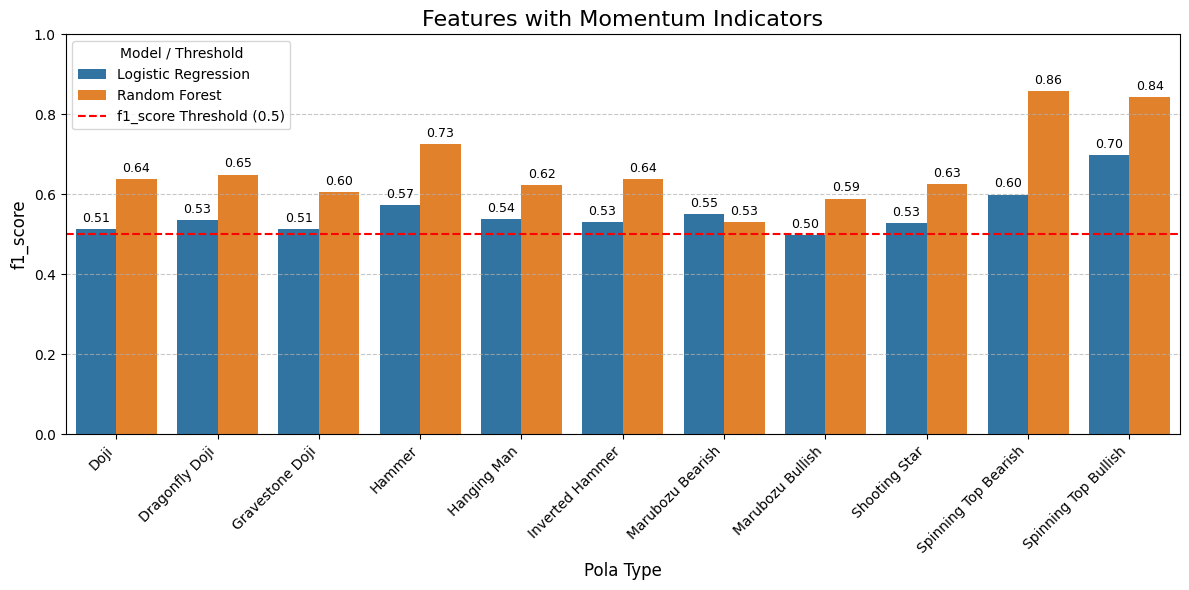

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Best practice: Buat Figure dan Axes
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat bar plot
sns.barplot(data=combined_results_df_momentum, x='Pola', y='f1_score', hue='Model')

# --- MENAMBAHKAN GARIS AKURASI 0.5 ---
plt.axhline(y=0.5, color='r', linestyle='--', label='f1_score Threshold (0.5)')

# --- MENAMBAHKAN LABEL ANGKA F1 SCORE ---
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

# Mengatur judul dan label
plt.title('Features with Momentum Indicators', fontsize=16)
plt.xlabel('Pola Type', fontsize=12)
plt.ylabel('f1_score', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label sumbu X agar tidak tumpang tindih

# Menambahkan legenda untuk garis horizontal
plt.legend(title='Model / Threshold')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Menambahkan grid pada sumbu Y untuk keterbacaan
plt.ylim(0, 1) # Memastikan sumbu Y dari 0 hingga 1 (sesuai skala akurasi)

plt.tight_layout() # Menyesuaikan tata letak agar semua elemen terlihat
plt.show()

# Volume

In [44]:
all_indicators = ["MA","EMA","DEMA","KAMA","SMA","SAR","ADX","APO","BOP","CCI","DX","MACD","MFI","MOM","RSI","AD","ADOSC","OBV","ATR","NATR","TRANGE"]
volume = ["AD","ADOSC","OBV"]

In [45]:
# 1. Ambil kolom yang spesifik dari daftar 'overlap'
kolom_volume = [col for col in volume if col in undersampled_df.columns]

# 2. Ambil kolom-kolom "lain" dari df yang BUKAN indikator teknis dan bukan Pola atau Y
kolom_non_indikator_and_target = [col for col in undersampled_df.columns if col not in all_indicators + ['Pola', 'Y']]

# 3. Gabungkan kedua daftar kolom
kolom_final_volume = kolom_volume + kolom_non_indikator_and_target + ['Pola', 'Y']

# Lakukan subsetting
df_final_volume = undersampled_df[kolom_final_volume]

In [46]:
unique_polas = df_final_volume['Pola'].unique()
lr_results = []

for pola in unique_polas:
  results = train_and_evaluate_pola_model_optimized(df_final_volume, pola)
  if results: # Only append if results were returned (i.e., not None due to insufficient data)
    lr_results.append({'Pola': pola, **results})

print("Logistic Regression Results:")
display(pd.DataFrame(lr_results))

--- Training Model with Hyperparameter Tuning for Pola: Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Dragonfly Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Gravestone Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Hammer ---
--- Training Model with Hyperparameter Tuning for Pola: Hanging Man ---
--- Training Model with Hyperparameter Tuning for Pola: Inverted Hammer ---
--- Training Model with Hyperparameter Tuning for Pola: Marubozu Bearish ---
--- Training Model with Hyperparameter Tuning for Pola: Marubozu Bullish ---
--- Training Model with Hyperparameter Tuning for Pola: Shooting Star ---
--- Training Model with Hyperparameter Tuning for Pola: Spinning Top Bearish ---
--- Training Model with Hyperparameter Tuning for Pola: Spinning Top Bullish ---
Logistic Regression Results:


,Pola,accuracy,f1_score,classification_report,confusion_matrix,best_params,model
0,Doji,0.520000,0.520000,precision recall f1-score ...,"[[104, 96], [96, 104]]",{'C': 0.464158883361278},LogisticRegression(C=np.float64(0.464158883361...
1,Dragonfly Doji,0.520833,0.497933,precision recall f1-score ...,"[[145, 55], [129, 55]]",{'C': 0.03593813663804628},LogisticRegression(C=np.float64(0.035938136638...
2,Gravestone Doji,0.470000,0.469947,precision recall f1-score ...,"[[92, 108], [104, 96]]",{'C': 0.464158883361278},LogisticRegression(C=np.float64(0.464158883361...
3,Hammer,0.555263,0.554459,precision recall f1-score ...,"[[101, 99], [70, 110]]",{'C': 5.994842503189409},LogisticRegression(C=np.float64(5.994842503189...
4,Hanging Man,0.507500,0.476728,precision recall f1-score ...,"[[53, 147], [50, 150]]",{'C': 1.6681005372000592},LogisticRegression(C=np.float64(1.668100537200...
5,Inverted Hammer,0.495000,0.493175,precision recall f1-score ...,"[[87, 113], [89, 111]]",{'C': 0.464158883361278},LogisticRegression(C=np.float64(0.464158883361...
6,Marubozu Bearish,0.530000,0.529988,precision recall f1-score ...,"[[105, 95], [93, 107]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
7,Marubozu Bullish,0.540000,0.532698,precision recall f1-score ...,"[[83, 117], [67, 133]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
8,Shooting Star,0.505000,0.503996,precision recall f1-score ...,"[[92, 108], [90, 110]]",{'C': 0.464158883361278},LogisticRegression(C=np.float64(0.464158883361...
9,Spinning Top Bearish,0.623656,0.624016,precision recall f1-score ...,"[[127, 73], [67, 105]]",{'C': 1.6681005372000592},LogisticRegression(C=np.float64(1.668100537200...


In [47]:
unique_polas = df_final_volume['Pola'].unique()
rf_results = []

for pola in unique_polas:
  results = train_and_evaluate_pola_model_rf_gridsearch(df_final_volume, pola)
  if results: # Only append if results were returned (i.e., not None due to insufficient data)
    rf_results.append({'Pola': pola, **results})

print("Random Forest Results:")
display(pd.DataFrame(rf_results))

--- Starting Comprehensive RF GridSearch for Pola: Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Dragonfly Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Gravestone Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Hammer ---
--- Starting Comprehensive RF GridSearch for Pola: Hanging Man ---
--- Starting Comprehensive RF GridSearch for Pola: Inverted Hammer ---
--- Starting Comprehensive RF GridSearch for Pola: Marubozu Bearish ---
--- Starting Comprehensive RF GridSearch for Pola: Marubozu Bullish ---
--- Starting Comprehensive RF GridSearch for Pola: Shooting Star ---
--- Starting Comprehensive RF GridSearch for Pola: Spinning Top Bearish ---
--- Starting Comprehensive RF GridSearch for Pola: Spinning Top Bullish ---
Random Forest Results:


,Pola,accuracy,f1_score,classification_report,confusion_matrix,best_params
0,Doji,0.570000,0.569957,precision recall f1-score ...,"[[116, 84], [88, 112]]","{'criterion': 'entropy', 'max_depth': 8, 'min_..."
1,Dragonfly Doji,0.578125,0.578297,precision recall f1-score ...,"[[116, 84], [78, 106]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
2,Gravestone Doji,0.552500,0.551870,precision recall f1-score ...,"[[103, 97], [82, 118]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
3,Hammer,0.660526,0.660646,precision recall f1-score ...,"[[134, 66], [63, 117]]","{'criterion': 'entropy', 'max_depth': 9, 'min_..."
4,Hanging Man,0.607500,0.604472,precision recall f1-score ...,"[[104, 96], [61, 139]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
5,Inverted Hammer,0.627500,0.626470,precision recall f1-score ...,"[[136, 64], [85, 115]]","{'criterion': 'entropy', 'max_depth': 9, 'min_..."
6,Marubozu Bearish,0.525000,0.524239,precision recall f1-score ...,"[[113, 87], [103, 97]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
7,Marubozu Bullish,0.535000,0.527619,precision recall f1-score ...,"[[82, 118], [68, 132]]","{'criterion': 'entropy', 'max_depth': 8, 'min_..."
8,Shooting Star,0.555000,0.554822,precision recall f1-score ...,"[[115, 85], [93, 107]]","{'criterion': 'entropy', 'max_depth': 9, 'min_..."
9,Spinning Top Bearish,0.725806,0.725236,precision recall f1-score ...,"[[131, 69], [33, 139]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."


In [48]:
lr_df = pd.DataFrame(lr_results)
lr_df['Model'] = 'Logistic Regression'

rf_df = pd.DataFrame(rf_results)
rf_df['Model'] = 'Random Forest'

combined_results_df_volume = pd.concat([lr_df, rf_df], ignore_index=True)

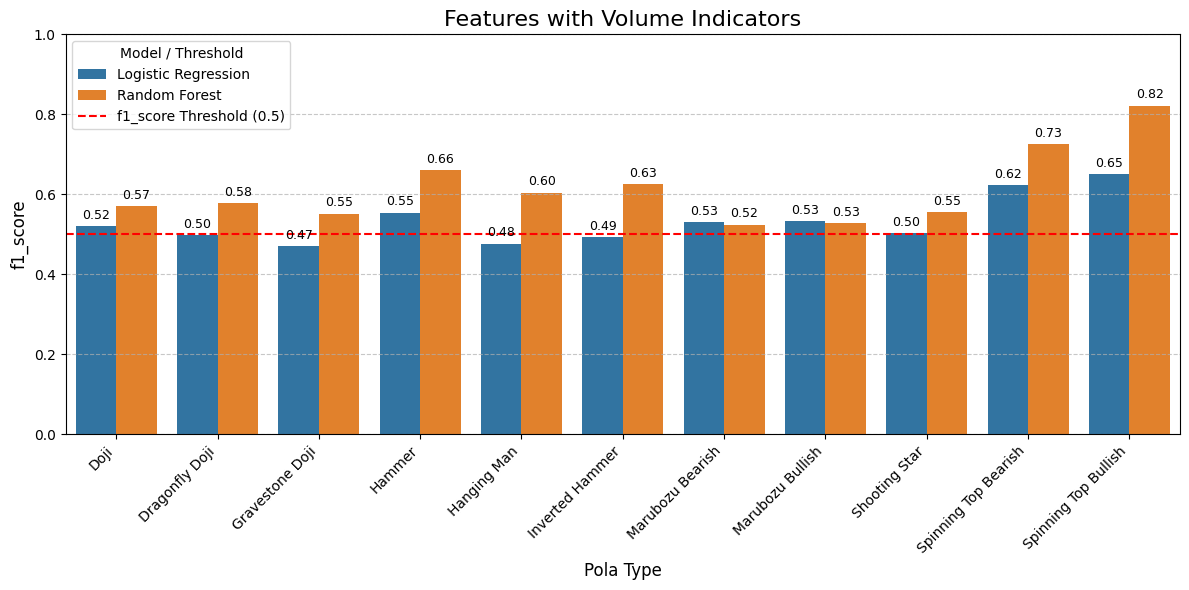

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Best practice: Buat Figure dan Axes
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat bar plot
sns.barplot(data=combined_results_df_volume, x='Pola', y='f1_score', hue='Model')

# --- MENAMBAHKAN GARIS AKURASI 0.5 ---
plt.axhline(y=0.5, color='r', linestyle='--', label='f1_score Threshold (0.5)')

# --- MENAMBAHKAN LABEL ANGKA F1 SCORE ---
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

# Mengatur judul dan label
plt.title('Features with Volume Indicators', fontsize=16)
plt.xlabel('Pola Type', fontsize=12)
plt.ylabel('f1_score', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label sumbu X agar tidak tumpang tindih

# Menambahkan legenda untuk garis horizontal
plt.legend(title='Model / Threshold')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Menambahkan grid pada sumbu Y untuk keterbacaan
plt.ylim(0, 1) # Memastikan sumbu Y dari 0 hingga 1 (sesuai skala akurasi)

plt.tight_layout() # Menyesuaikan tata letak agar semua elemen terlihat
plt.show()

# Volatility

In [50]:
all_indicators = ["MA","EMA","DEMA","KAMA","SNA","SAR","ADX","APO","BOP","CCI","DX","MACD","MFI","MOM","RSI","AD","ADOSC","OBV","ATR","NATR","TRANGE"]
volatility = ["ATR","NATR","TRANGE"]

In [51]:
# 1. Ambil kolom yang spesifik dari daftar 'volatility'
kolom_volatility = [col for col in volatility if col in undersampled_df.columns]

# 2. Ambil kolom-kolom "lain" dari df yang BUKAN indikator teknis dan bukan Pola atau Y
kolom_non_indikator_and_target = [col for col in undersampled_df.columns if col not in all_indicators + ['Pola', 'Y']]

# 3. Gabungkan kedua daftar kolom
kolom_final_volatility = kolom_volatility + kolom_non_indikator_and_target + ['Pola', 'Y']

# Lakukan subsetting
df_final_volatility = undersampled_df[kolom_final_volatility]

In [52]:
unique_polas = df_final_volatility['Pola'].unique()
lr_results = []

for pola in unique_polas:
  results = train_and_evaluate_pola_model_optimized(df_final_volatility, pola)
  if results: # Only append if results were returned (i.e., not None due to insufficient data)
    lr_results.append({'Pola': pola, **results})

print("Logistic Regression Results:")
display(pd.DataFrame(lr_results))

--- Training Model with Hyperparameter Tuning for Pola: Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Dragonfly Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Gravestone Doji ---
--- Training Model with Hyperparameter Tuning for Pola: Hammer ---
--- Training Model with Hyperparameter Tuning for Pola: Hanging Man ---
--- Training Model with Hyperparameter Tuning for Pola: Inverted Hammer ---
--- Training Model with Hyperparameter Tuning for Pola: Marubozu Bearish ---
--- Training Model with Hyperparameter Tuning for Pola: Marubozu Bullish ---
--- Training Model with Hyperparameter Tuning for Pola: Shooting Star ---
--- Training Model with Hyperparameter Tuning for Pola: Spinning Top Bearish ---
--- Training Model with Hyperparameter Tuning for Pola: Spinning Top Bullish ---
Logistic Regression Results:


,Pola,accuracy,f1_score,classification_report,confusion_matrix,best_params,model
0,Doji,0.540000,0.539816,precision recall f1-score ...,"[[104, 96], [88, 112]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
1,Dragonfly Doji,0.536458,0.530464,precision recall f1-score ...,"[[129, 71], [107, 77]]",{'C': 5.994842503189409},LogisticRegression(C=np.float64(5.994842503189...
2,Gravestone Doji,0.532500,0.532427,precision recall f1-score ...,"[[109, 91], [96, 104]]",{'C': 5.994842503189409},LogisticRegression(C=np.float64(5.994842503189...
3,Hammer,0.576316,0.570547,precision recall f1-score ...,"[[137, 63], [98, 82]]",{'C': 0.01},"LogisticRegression(C=np.float64(0.01), max_ite..."
4,Hanging Man,0.500000,0.499987,precision recall f1-score ...,"[[99, 101], [99, 101]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...
5,Inverted Hammer,0.545000,0.530625,precision recall f1-score ...,"[[144, 56], [126, 74]]",{'C': 0.464158883361278},LogisticRegression(C=np.float64(0.464158883361...
6,Marubozu Bearish,0.505000,0.482163,precision recall f1-score ...,"[[143, 57], [141, 59]]",{'C': 0.03593813663804628},LogisticRegression(C=np.float64(0.035938136638...
7,Marubozu Bullish,0.520000,0.496737,precision recall f1-score ...,"[[61, 139], [53, 147]]",{'C': 0.03593813663804628},LogisticRegression(C=np.float64(0.035938136638...
8,Shooting Star,0.507500,0.501742,precision recall f1-score ...,"[[80, 120], [77, 123]]",{'C': 0.464158883361278},LogisticRegression(C=np.float64(0.464158883361...
9,Spinning Top Bearish,0.575269,0.565167,precision recall f1-score ...,"[[143, 57], [101, 71]]",{'C': 0.1291549665014884},LogisticRegression(C=np.float64(0.129154966501...


In [53]:
unique_polas = df_final_volatility['Pola'].unique()
rf_results = []

for pola in unique_polas:
  results = train_and_evaluate_pola_model_rf_gridsearch(df_final_volatility, pola)
  if results: # Only append if results were returned (i.e., not None due to insufficient data)
    rf_results.append({'Pola': pola, **results})

print("Random Forest Results:")
display(pd.DataFrame(rf_results))

--- Starting Comprehensive RF GridSearch for Pola: Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Dragonfly Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Gravestone Doji ---
--- Starting Comprehensive RF GridSearch for Pola: Hammer ---
--- Starting Comprehensive RF GridSearch for Pola: Hanging Man ---
--- Starting Comprehensive RF GridSearch for Pola: Inverted Hammer ---
--- Starting Comprehensive RF GridSearch for Pola: Marubozu Bearish ---
--- Starting Comprehensive RF GridSearch for Pola: Marubozu Bullish ---
--- Starting Comprehensive RF GridSearch for Pola: Shooting Star ---
--- Starting Comprehensive RF GridSearch for Pola: Spinning Top Bearish ---
--- Starting Comprehensive RF GridSearch for Pola: Spinning Top Bullish ---
Random Forest Results:


,Pola,accuracy,f1_score,classification_report,confusion_matrix,best_params
0,Doji,0.547500,0.547361,precision recall f1-score ...,"[[113, 87], [94, 106]]","{'criterion': 'entropy', 'max_depth': 9, 'min_..."
1,Dragonfly Doji,0.567708,0.566475,precision recall f1-score ...,"[[102, 98], [68, 116]]","{'criterion': 'entropy', 'max_depth': 9, 'min_..."
2,Gravestone Doji,0.565000,0.563154,precision recall f1-score ...,"[[100, 100], [74, 126]]","{'criterion': 'entropy', 'max_depth': 9, 'min_..."
3,Hammer,0.686842,0.686953,precision recall f1-score ...,"[[139, 61], [58, 122]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
4,Hanging Man,0.565000,0.562198,precision recall f1-score ...,"[[97, 103], [71, 129]]","{'criterion': 'gini', 'max_depth': 8, 'min_sam..."
5,Inverted Hammer,0.597500,0.597477,precision recall f1-score ...,"[[118, 82], [79, 121]]","{'criterion': 'entropy', 'max_depth': 9, 'min_..."
6,Marubozu Bearish,0.530000,0.520604,precision recall f1-score ...,"[[134, 66], [122, 78]]","{'criterion': 'entropy', 'max_depth': 4, 'min_..."
7,Marubozu Bullish,0.532500,0.522103,precision recall f1-score ...,"[[77, 123], [64, 136]]","{'criterion': 'gini', 'max_depth': 8, 'min_sam..."
8,Shooting Star,0.555000,0.554097,precision recall f1-score ...,"[[102, 98], [80, 120]]","{'criterion': 'entropy', 'max_depth': 9, 'min_..."
9,Spinning Top Bearish,0.701613,0.700894,precision recall f1-score ...,"[[126, 74], [37, 135]]","{'criterion': 'gini', 'max_depth': 9, 'min_sam..."


In [54]:
lr_df = pd.DataFrame(lr_results)
lr_df['Model'] = 'Logistic Regression'

rf_df = pd.DataFrame(rf_results)
rf_df['Model'] = 'Random Forest'

combined_results_df_volatility = pd.concat([lr_df, rf_df], ignore_index=True)

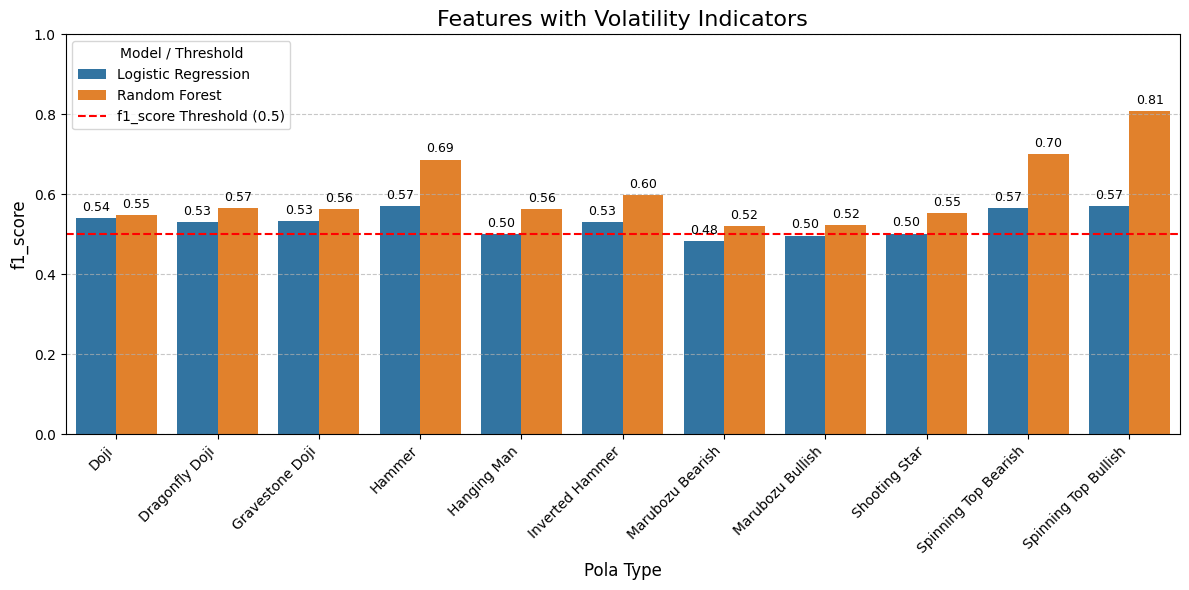

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Best practice: Buat Figure dan Axes
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat bar plot
sns.barplot(data=combined_results_df_volatility, x='Pola', y='f1_score', hue='Model')

# --- MENAMBAHKAN GARIS AKURASI 0.5 ---
plt.axhline(y=0.5, color='r', linestyle='--', label='f1_score Threshold (0.5)')

# --- MENAMBAHKAN LABEL ANGKA F1 SCORE ---
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=3)

# Mengatur judul dan label
plt.title('Features with Volatility Indicators', fontsize=16)
plt.xlabel('Pola Type', fontsize=12)
plt.ylabel('f1_score', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label sumbu X agar tidak tumpang tindih

# Menambahkan legenda untuk garis horizontal
plt.legend(title='Model / Threshold')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Menambahkan grid pada sumbu Y untuk keterbacaan
plt.ylim(0, 1) # Memastikan sumbu Y dari 0 hingga 1 (sesuai skala akurasi)

plt.tight_layout() # Menyesuaikan tata letak agar semua elemen terlihat
plt.show()